<a href="https://colab.research.google.com/github/Chuck2Win/Linear_regression-from-Scratch-/blob/master/Logistic_regression(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

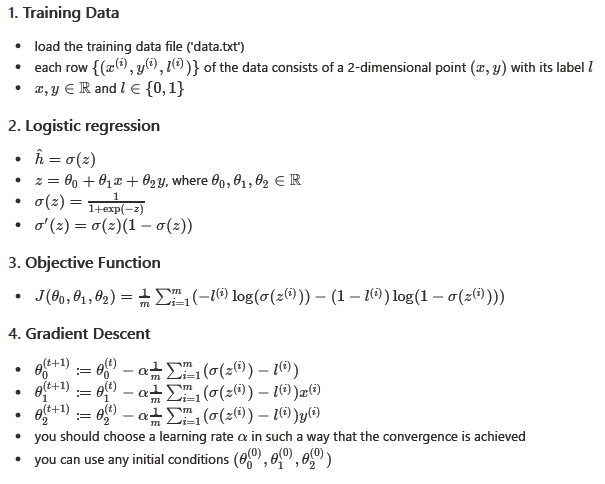


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. plott the training data

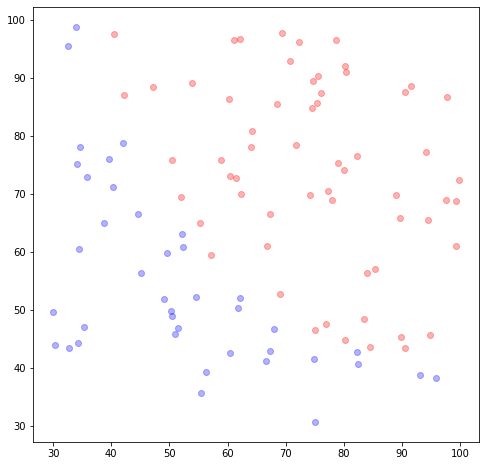

In [97]:
data=np.genfromtxt('https://raw.githubusercontent.com/Chuck2Win/Linear_regression-from-Scratch-/master/data/data.txt',delimiter=',')
x=data[:,0]
y=data[:,1]
label=data[:,2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [132]:
# version 1 - for문을 많이 쓰는 구조
def hypothesis(theta0,theta1,theta2,x_i,y_i):
    # 각 점에 대한 예측값
    return sigmoid(theta0+theta1*x+theta2*y_i)
def objective_function(theta0,theta1,X,Y,Z):
    s=0
    m=len(X)
    for i in range(m):
        s+=(-Z[i]*np.log(hypothesis(theta0,theta1,theta2,X[i],Y[i]))-(1-Z[i])*np.log(1-hypothesis(theta0,theta1,theta2,X[i],Y[i])))
    return s/m
def gradient_descent(theta0,theta1,theta2,X,Y,Z,learning_rate):
    s=0
    m=len(X)
    for i in range(m):
        s+=(hypothesis(theta0,theta1,theta2,X[i],Y[i])-Z[i])
    theta0=theta0-learning_rate*s/m
    s=0
    m=len(X)
    for i in range(m):
        s+=(hypothesis(theta0,theta1,theta2,X[i],Y[i])-Z[i])*X[i]
    theta1=theta1-learning_rate*s/m
    s=0
    m=len(X)
    for i in range(m):
        s+=(hypothesis(theta0,theta1,theta2,X[i],Y[i])-Z[i])*Y[i]
    theta2=theta2-learning_rate*s/m
    return theta0,theta1,theta2        

def sigmoid(x):
    return 1./(1.+np.exp(-x))

# version 2 . broad cast 구조
def make_one(X,Y):
    input=np.ones((len(X),3)) 
    input[:,1]=X
    input[:,2]=Y
    return input
# make one은 행렬 형태로 묶어주기 위해서 존재 (저번시간에 설명했음)

def hypothesis2(theta,input):
    # theta=[theta0,theta1,theta2]
    # 모든 점에 대한 예측값
    return sigmoid(np.dot(input,theta))
    
def objective_function2(theta,input,Z):
    return (-Z*np.log(hypothesis2(theta,input))-(1-Z)*np.log(1-hypothesis2(theta,input))).mean()
    
def gradient_descent2(theta,input,Z,learning_rate):
    theta=theta-learning_rate*((hypothesis2(theta,input)-Z).reshape(-1,1)*input).sum(axis=0)
    return theta

In [148]:
# theta_0 초기값 -7, theta_1 초기값 0, theta_2 초기값 0
# learning rate 0.01
# epoch 만큼
cost=[]
epochs=10000
theta=np.array([-7,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append

learning_rate=0.00001
x=x.copy()
y=y.copy()
z=label.copy()
input=make_one(x,y)
for epoch in range(epochs):
    cost.append(objective_function2(theta,input,z))
    theta=gradient_descent2(theta,input,z,learning_rate)
    Theta.append(list(theta)) 
Theta=np.array(Theta)   

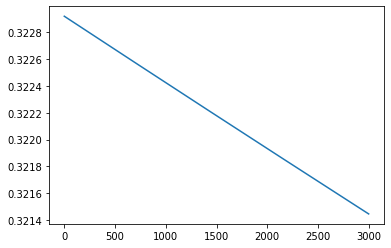

In [149]:
plt.plot(cost[7000:])

# 2. Plot the estimated parameters


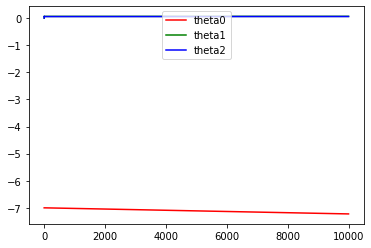

In [150]:
color=['red','green','blue']

for i in range(3):
    plt.plot(Theta[:,i],label='theta%d'%i,c=color[i])
    plt.legend(loc=9)
plt.show()

# 3. Plot the training error

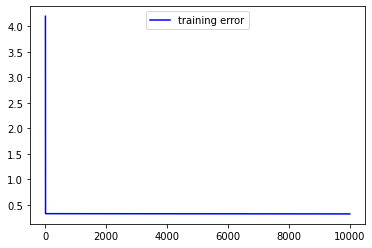

In [151]:
plt.plot(cost,c='blue',label='training error')
plt.legend(loc=9)
plt.show()

In [152]:
# check accuracy
((hypothesis2(Theta[-1],input)>=0.5)==z).mean()

0.93

# 4. Plot the obtained classifier
classifier : hypothesis로 정의된 함수
x는 30부터 100까지 0.5 간격
y는 30부터 100까지 0.5 간격
0으로 분류 된 것은 blue
1으로 분류 된 것은 red

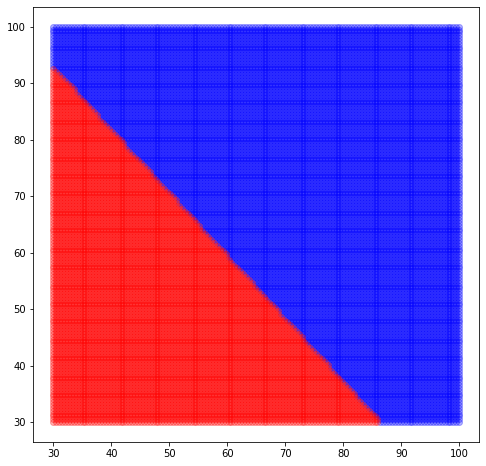

In [154]:
a=np.linspace(30,100,(100-30)*2)
b=np.linspace(30,100,(100-30)*2)
c=[]
for i in a:
    for j in b:
        c.append([1,i,j])
c=np.array(c)
ha=hypothesis2(Theta[-1],c)
a_label0 = c[:,1][ha > 0.5]
a_label1 = c[:,1][ha < 0.5]
b_label0 = c[:,2][ha > 0.5]
b_label1 = c[:,2][ha < 0.5]
plt.figure(figsize=(8, 8))
plt.scatter(a_label0, b_label0, alpha=0.3, c='b')
plt.scatter(a_label1, b_label1, alpha=0.3, c='r')
plt.show()


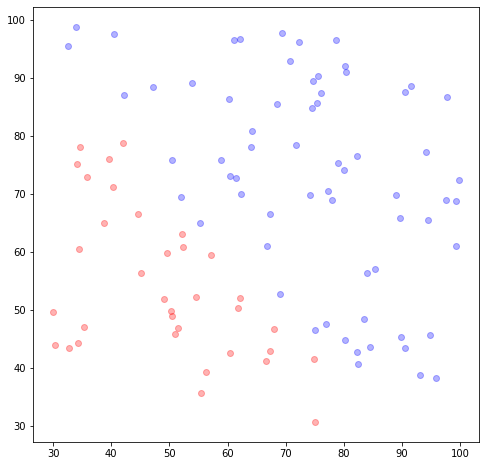

In [155]:
# 우리 데이터
ha=hypothesis2(Theta[-1],input)
x_label0 = input[:,1][ha > 0.5]
x_label1 = input[:,1][ha < 0.5]
y_label0 = input[:,2][ha > 0.5]
y_label1 = input[:,2][ha < 0.5]
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()
# 모두 다 1로 분류함.